In [1]:
!pip install imblearn

In [2]:
import imblearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

Load the dataset and explore the variables.

In [5]:
churnData = pd.read_csv('files_for_lab/customer_churn.csv') #Data import of customer churn

churnData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


 Predict variable Churn using
 a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
churnDataFiltered = churnData[["Churn","tenure","SeniorCitizen","MonthlyCharges"]]
display(churnDataFiltered)

,Churn,tenure,SeniorCitizen,MonthlyCharges
0,No,1,0,29.85
1,No,34,0,56.95
2,Yes,2,0,53.85
3,No,45,0,42.30
4,Yes,2,0,70.70
...,...,...,...,...
7038,No,24,0,84.80
7039,No,72,0,103.20
7040,No,11,0,29.60
7041,Yes,4,1,74.40


In [7]:
X = churnDataFiltered.drop('Churn',axis = 1)
y = churnDataFiltered['Churn']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13) 

In [9]:
transformer = StandardScaler().fit(X_train)

X_train_scaled = pd.DataFrame(transformer.transform(X_train),columns=X.columns)

X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)

X_train_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-1.252158,-0.438856,-1.521692
1,-1.293090,-0.438856,-1.495003
2,1.162854,-0.438856,1.373994
3,-1.293090,-0.438856,0.211383
4,-1.170293,-0.438856,0.509959


In [10]:
y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

Building the logistic regression model

<AxesSubplot:>

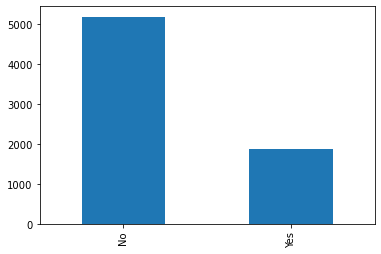

In [11]:
count_classes = churnDataFiltered['Churn'].value_counts()
count_classes.plot(kind = 'bar')

In [12]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=13, solver='lbfgs')
LR.fit(X_train_scaled, y_train)

LogisticRegression(random_state=13)

In [14]:
logits = np.log(1/LR.predict_proba(X_train_scaled)[:,1]-1)


Evaluate the model: